<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/05_Pet_Breeds/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 727kB 13.9MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 1.2MB 31.3MB/s 
     |████████████████████████████████| 194kB 59.3MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 219kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/'images').ls()[0]

Path('images/shiba_inu_79.jpg')

In [ ]:
fname = (path/'images').ls()[0]
fname

Path('images/shiba_inu_79.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg',fname.name)

['shiba_inu']

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [ ]:
#Baseline
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(11)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.471975,0.419482,0.134641,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.483163,0.376827,0.121786,01:11
1,0.323836,0.275221,0.083221,01:12


In [ ]:
learn.recorder.plot_loss()

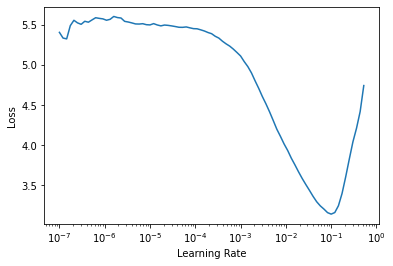

In [ ]:
#Find a good lr and train again
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
#Min is (lr for smallest loss)/ and steep the point the one with higher gradient
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [ ]:
#Take a lr smaller than steepest
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(11, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.256881,0.366213,0.111637,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.525439,0.420047,0.127199,01:12
1,0.310600,0.265762,0.085927,01:12


In [ ]:
learn.recorder.plot_loss()

In [ ]:
#We have calculated best lr with the old layers of resnet34 freeze
#but fine_tune train once with the layers freezed and the num of epochs unfreeze
#Lets calculate new lr

In [ ]:
#First one cycle before we unfreeze
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(11, lr_max=1e-5)